In [125]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

In [40]:
# datafolder = '../../CCUS/data/well_design_exp3/rst_npy_VERDSPLGEO/'
datafolder = '../../CCUS/data/well_design_exp3/rst_npy/'


caseid = [int(x.split('_')[0][4:]) for x in os.listdir(datafolder)]
caseid = list(set(caseid))

In [143]:
prop_arr = case130[:,:,0,:].reshape(1,33,33,120)
for ii in caseid:
    if ii != 144:
        globals()[f'case{ii}'] = np.load(os.path.join(datafolder, f'case{ii}_SG.npy'))
        prop_arr= np.concatenate((prop_arr, globals()[f'case{ii}'][:,:,60,:].reshape(1,33,33,120)),axis=0)

prop_arr = prop_arr[1:,:,:,:]

In [144]:
image = prop_arr.reshape(15,-1)

Number of components explaining 99% variance: 9


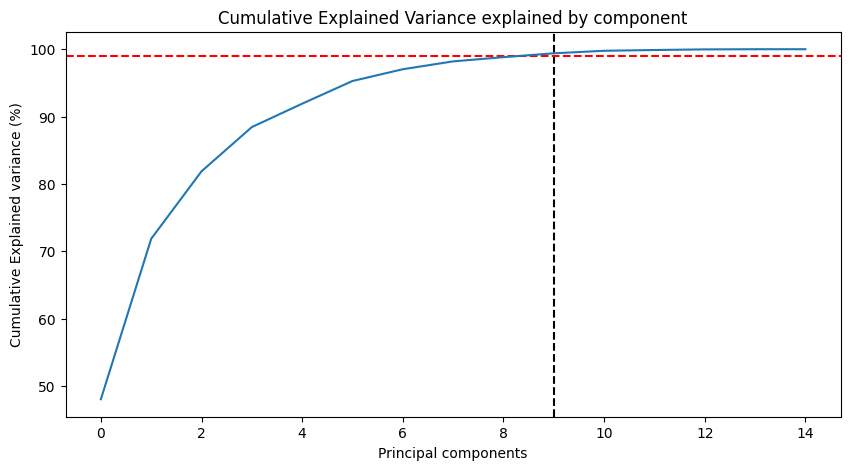

In [145]:
pca = PCA()
pca.fit(image)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
ax = plt.plot(var_cumu)

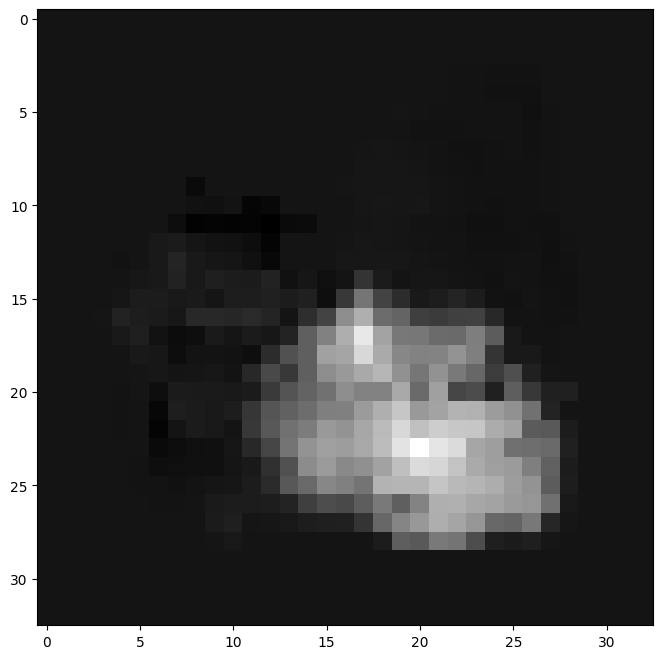

In [146]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon.reshape(15,33,33,120)[0,:,:,10],cmap = plt.cm.gray)
plt.show()

In [147]:
image_recon.reshape(15,33,33,120)[0,:,:,10].shape

(33, 33)

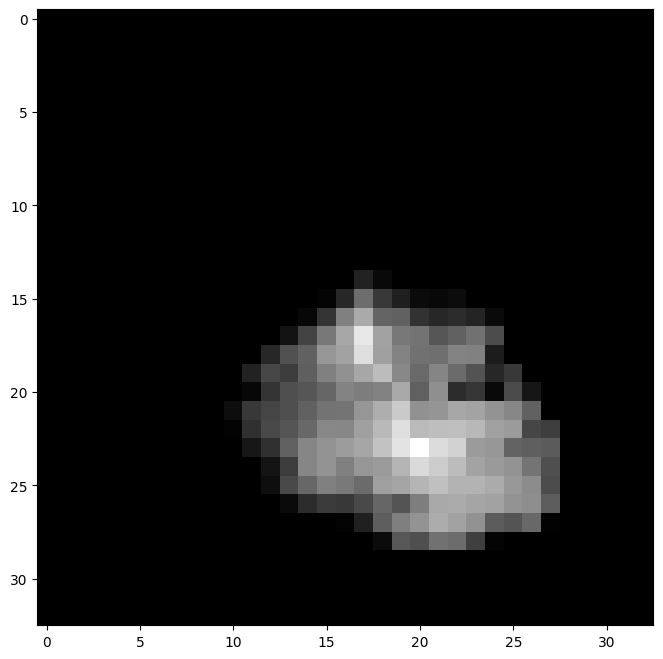

In [148]:
plt.figure(figsize=[12,8])
plt.imshow(image.reshape(15,33,33,120)[0,:,:,10],cmap = plt.cm.gray)
plt.show()

In [149]:
myPCs = ipca.fit_transform(image)

In [150]:
myPCs.shape

(15, 9)

In [ ]:
np.save('../pyDGSA/data/video_PCs.npy', myPCs)

Number of components explaining 96% variance: 2


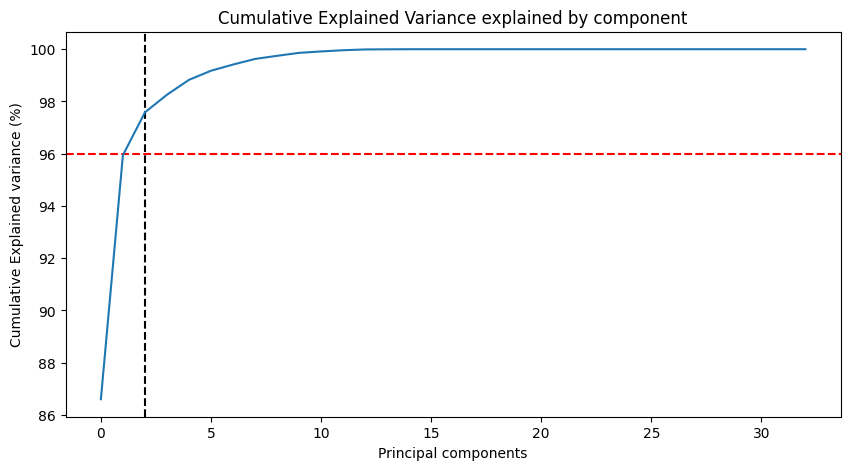

In [84]:



image = case130[:,:,60,10]
pca = PCA()
pca.fit(image)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>96)
print("Number of components explaining 96% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=96, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [85]:
len(pca.components_)

33

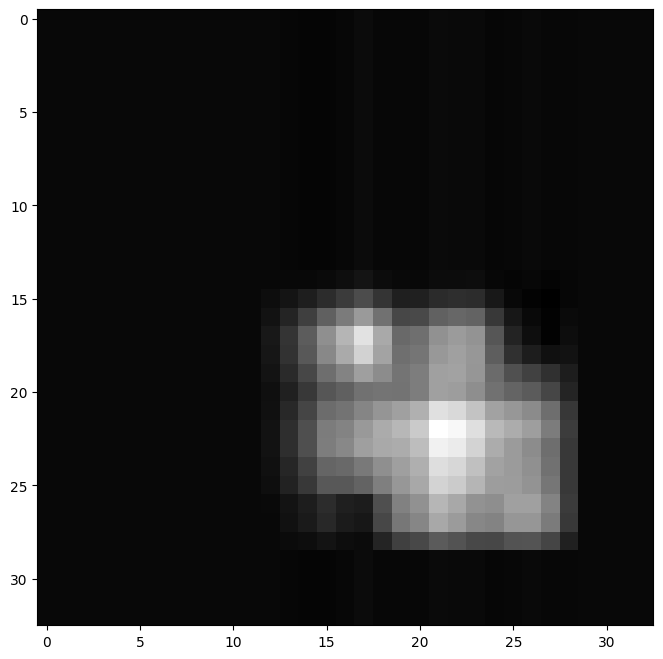

In [89]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)
plt.show()

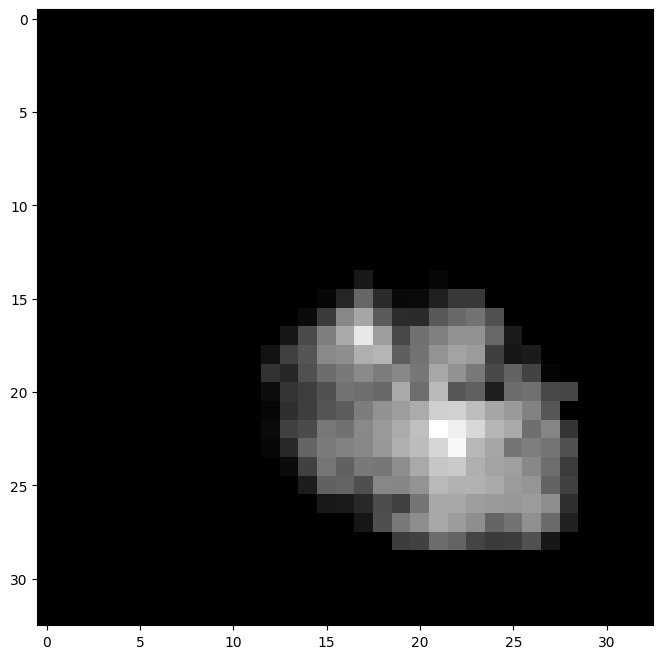

In [88]:
plt.figure(figsize=[12,8])
plt.imshow(image,cmap = plt.cm.gray)
plt.show()

In [91]:
ipca.fit_transform(image).shape

(33, 2)

In [ ]:
dfts = pd.read_csv('../../CCUS/data/well_design_exp3/rst_csv/')

In [102]:
csv_dir = '../../CCUS/data/well_design_exp3/rst_csv'
batch_items = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'batch7']

dfco2 = pd.DataFrame()
dffault = pd.DataFrame()
dfdP = pd.DataFrame()
dfdPres = pd.DataFrame()
for it in batch_items:
    dfco2_temp = pd.read_csv(os.path.join(csv_dir, f'{it}_co2_plume_size.csv'))
    dffault_temp = pd.read_csv(os.path.join(csv_dir, f'{it}_dp_fault2027.csv'))
    dfdP_temp = pd.read_csv(os.path.join(csv_dir, f'{it}_dp_top.csv'))
    dfdPres_temp = pd.read_csv(os.path.join(csv_dir, f'{it}_dPres.csv'))
    dfco2 = pd.concat([dfco2, dfco2_temp])
    dffault = pd.concat([dffault, dffault_temp])
    dfdP = pd.concat([dfdP, dfdP_temp])
    dfdPres = pd.concat([dfdPres, dfdPres_temp])

In [103]:
dfco2

,caseid,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142
0,1.0,0.0,5.137162,7.363266,8.990034,11.216138,13.271002,15.240248,16.524539,17.637590,...,23.630946,23.630946,23.630946,23.630946,23.630946,23.630946,23.630946,23.630946,23.630946,23.630946
1,2.0,0.0,3.852872,6.592692,9.075653,11.644234,14.384054,16.867016,18.579403,20.377410,...,26.884482,26.884482,26.884482,26.970102,26.970102,26.970102,26.970102,26.970102,26.970102,26.970102
2,3.0,0.0,4.709065,6.335833,8.476318,10.359944,12.842906,13.955957,15.325867,16.610158,...,21.062365,21.062365,21.062365,21.062365,21.147985,21.147985,21.147985,21.147985,21.147985,21.147985
3,4.0,0.0,4.366588,7.192027,9.161273,11.986712,14.298435,16.267680,17.894448,19.093120,...,25.086476,25.086476,25.086476,25.086476,25.086476,25.086476,25.086476,25.086476,25.086476,25.086476
4,5.0,0.0,4.195349,6.335833,9.075653,11.472996,14.041577,16.096442,18.322545,19.521217,...,25.942669,25.942669,25.942669,25.942669,25.942669,26.028289,26.028289,26.028289,26.028289,26.028289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,842.0,0.0,3.167917,6.507072,9.674989,13.185383,16.096442,18.065687,20.034933,21.832940,...,36.216994,36.302613,36.388233,36.388233,36.388233,36.388233,36.388233,36.388233,36.388233,36.388233
117,843.0,0.0,2.825439,6.421453,9.674989,12.842906,15.839584,18.236926,20.206171,22.346656,...,35.960136,35.960136,35.960136,35.960136,35.960136,35.960136,36.045755,36.045755,36.045755,36.131374
118,844.0,0.0,3.681633,6.507072,9.674989,12.757286,15.069009,17.466352,19.606836,21.576081,...,36.730710,36.730710,36.730710,36.816329,36.816329,36.816329,36.816329,36.816329,36.816329,36.730710
119,845.0,0.0,4.280969,6.164595,8.305079,10.359944,12.243570,14.298435,15.069009,16.096442,...,35.617658,35.703278,35.703278,35.874516,35.874516,36.131374,36.131374,36.131374,36.216994,36.388233


In [107]:
datats = dfco2.values[:,1:]

Number of components explaining 99% variance: 1


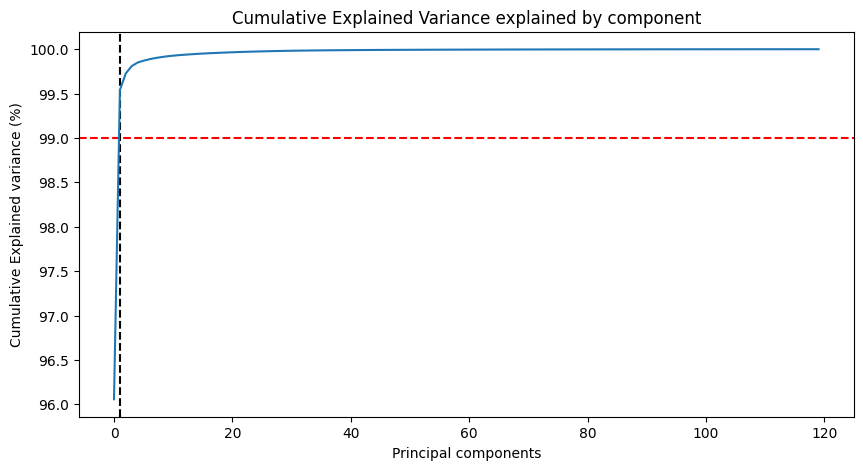

In [110]:
image = datats
pca = PCA()
pca.fit(image)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
ax = plt.plot(var_cumu)

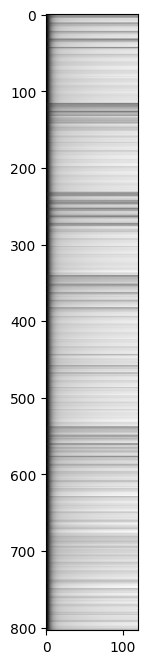

In [111]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)
plt.show()

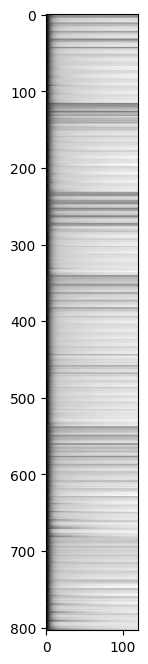

In [112]:
plt.figure(figsize=[12,8])
plt.imshow(image,cmap = plt.cm.gray)
plt.show()

In [117]:
myPCs = ipca.fit_transform(image)

In [119]:
# np.save('../pyDGSA/data/TS_PCs.npy', myPCs)